In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import nibabel as nb
from scipy.stats import spearmanr, pearsonr, sem
from sklearn import linear_model


/home/users/kwagstyl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/users/kwagstyl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/users/kwagstyl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/users/kwagstyl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/users/kwagstyl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: Runti

In [2]:

#Visual all_visual_areas left hemisphere
NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
#Hierarchical
HierarchyLevels=np.array([1,2,3,5,4,4,5,5,7,6,6,7,5,6,6,6,7,7,7,6,8,7])
#from human LO V6 (read DP from macaque) and FFC V8 
#otherwise combined Markov and van Essen


#Visual all_visual_areas left hemisphere
#old matlab references
#lV=[24, 26, 32, 35, 37, 38, 40, 41, 66, 67, 69, 72];
#Visual all_visual_areas right hemisphere

#rV=[25, 27, 33, 36, 38, 39, 41, 42, 66, 67, 103, 117];



In [3]:
hemi='lh'
hemic='left'
Parcellation = nb.freesurfer.io.read_annot('/data1/users/kwagstyl/wmdist/CIVET/CIVET2_average/label/'+hemi+'.HCP-MMP1.annot')


In [23]:
PNames=Parcellation[2]
Plocations=np.array(Parcellation[0])
for k,name in enumerate(PNames):
    PNames[k]=name.decode('UTF-8')
PNames

In [5]:
if hemi=='rh':
    NamesHCP=np.core.defchararray.replace(NamesHCP,'L_','R_')

In [6]:

TotalThickness=np.loadtxt('thickness_'+hemic+'_total_rsl.txt')
Thickness={}
for n in range(6):
    Thickness["layer{0}".format(n+1)]=np.loadtxt('thickness_'+hemic+'_layer'+str(n+1)+'_rsl.txt')



In [7]:
#Means
Mean_thickness=np.zeros(len(NamesHCP))
k=-1
for name in NamesHCP:
    k+=1
    ID=PNames.index(name)
    Mean_thickness[k]=np.mean(Thickness[np.where(Plocations==ID)[0]])

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
plt.scatter(HierarchyLevels,Mean_thickness)
pearsonr(HierarchyLevels,Mean_thickness)


In [ ]:
#stacked bar chart
N_L=np.unique(HierarchyLevels)
means=np.zeros((6,len(N_L)))
std=np.zeros((6,len(N_L)))
for n in range(6):
    i=-1
    for L in N_L:
        i+=1
        Regions=NamesHCP[np.where(HierarchyLevels==L)[0]]
        Mean_thickness=np.zeros(len(Regions))
        k=-1
        for r in Regions:
            k+=1
            ID=PNames.index(r)
            Mean_thickness[k]=np.mean(Thickness["layer{0}".format(n+1)][np.where(Plocations==ID)[0]])
        means[n,i]=np.mean(Mean_thickness)
        std[n,i]=np.std(Mean_thickness)

In [ ]:
Layers=['Layer I', 'Layer II','Layer III', 'Layer IV', 'Layer V', 'Layer VI']
N=len(N_L)
ind=np.arange(N)
width=0.7
colours=[50,200,150,250,200,100]
cmap=plt.get_cmap('Greys')
Plots={}
bottom=np.zeros(8)
for n in 5-np.arange(6):
    Plots["p{0}".format(n+1)] = plt.bar(ind, means[n,:], width, color=cmap(colours[n]),bottom=bottom)
    
    bottom+=means[n,:]
plt.xticks(ind,N_L)
#Plots[:]
plt.legend((Plots['p1'],Plots['p2'],Plots['p3'],Plots['p4'],Plots['p5'],Plots['p6']),Layers,title='Layer',bbox_to_anchor=(1.28,0.75),loc=5)

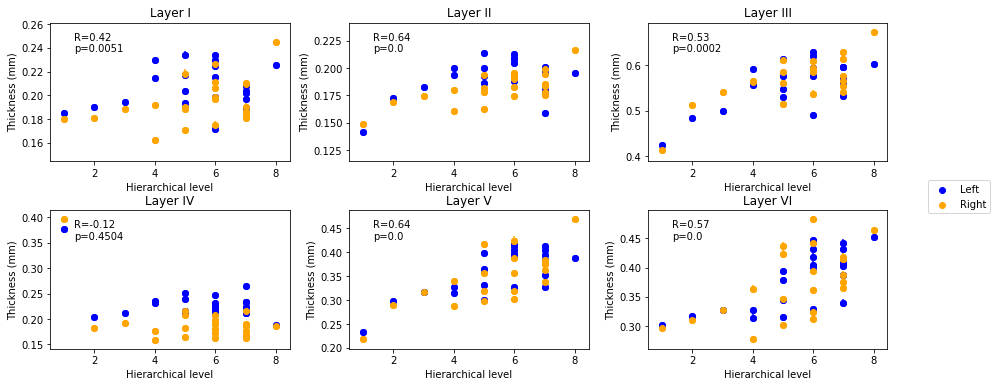

In [24]:
fig, axs = plt.subplots(2,3,figsize=(15,6))
fig.subplots_adjust(hspace=.35,wspace=.25)
axs=axs.ravel()
NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
#Hierarchical
HierarchyLevels=np.array([1,2,3,5,4,4,5,5,7,6,6,7,5,6,6,6,7,7,7,6,8,7])
Mean_thickness=np.zeros(len(NamesHCP))
Std_thickness=np.zeros(len(NamesHCP))
colours=['blue','orange']
hemis=['lh','rh']
hemics=['left','right']
Layers=['Layer I', 'Layer II','Layer III', 'Layer IV', 'Layer V', 'Layer VI']
Thickness={}
for i in range(6):
    for h in range(2):
        hemi=hemis[h]
        hemic=hemics[h]
        Parcellation = nb.freesurfer.io.read_annot('/data1/users/kwagstyl/wmdist/CIVET/CIVET2_average/label/'+hemi+'.HCP-MMP1.annot')
        PNames=Parcellation[2]
        for k,name in enumerate(PNames):
            PNames[k]=name.decode('UTF-8')
        Plocations=np.array(Parcellation[0])   
        NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
        if hemi=='rh':
            NamesHCP=np.core.defchararray.replace(NamesHCP,'L_','R_')
        Thickness["layer{0}".format(i+1)]=np.loadtxt('thickness_'+hemic+'_layer'+str(i+1)+'_rsl.txt')
        k=-1
        for name in NamesHCP:
            k+=1
            ID=PNames.index(name)
            Mean_thickness[k] = np.mean(Thickness["layer{0}".format(i+1)][np.where(Plocations==ID)[0]])
            Std_thickness[k] = sem(Thickness["layer{0}".format(i+1)][np.where(Plocations==ID)[0]])
        axs[i].scatter(HierarchyLevels,Mean_thickness,color=colours[h])
        axs[i].errorbar(HierarchyLevels,Mean_thickness,yerr=Std_thickness,fmt='o',color=colours[h])
       # m,b = np.polyfit(HierarchyLevels, Mean_thickness, 1)
   # axs[i].plot(HierarchyLevels, m*HierarchyLevels + b,'-',color='black')
        if hemi=='lh':
            Combi=Mean_thickness
        else:
            Combi=np.hstack((Mean_thickness,Combi))
            HierarchyCombi=np.hstack((HierarchyLevels,HierarchyLevels))
            R, P = spearmanr(HierarchyCombi,Combi)
            axs[i].annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4)),xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')
        axs[i].set_title(Layers[i])
        axs[i].set_xlabel('Hierarchical level')
        axs[i].set_ylabel('Thickness (mm)')
        
axs[5].legend(['Left','Right'],bbox_to_anchor=(1.45, 1.25))

fig.savefig('LayersHierarchy.pdf')

In [ ]:
Combi

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(6,8))
fig.subplots_adjust(hspace=.3,wspace=.2)
Mean_thickness=np.zeros(len(NamesHCP))
Std_thickness=np.zeros(len(NamesHCP))
for h in range(2):
        hemi=hemis[h]
        hemic=hemics[h]
        Parcellation = nb.freesurfer.io.read_annot('/data1/users/kwagstyl/wmdist/CIVET/CIVET2_average/label/'+hemi+'.HCP-MMP1.annot')
        PNames=Parcellation[2]
        Plocations=np.array(Parcellation[0])   
        TotalThickness=np.loadtxt('thickness_'+hemic+'_total_rsl.txt')
        NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
        if hemi=='rh':
            NamesHCP=np.core.defchararray.replace(NamesHCP,'L_','R_')
        k=-1
        for name in NamesHCP:
            k+=1
            ID=PNames.index(name)
            Mean_thickness[k] = np.mean(TotalThickness[np.where(Plocations==ID)[0]])
            Std_thickness[k] = sem(TotalThickness[np.where(Plocations==ID)[0]])
        if hemi=='lh':
            Combi=Mean_thickness
        else:
            Combi=np.hstack((Mean_thickness,Combi))
            HierarchyCombi=np.hstack((HierarchyLevels,HierarchyLevels))
            R, P = spearmanr(HierarchyCombi,Combi)
            axs.annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4)),xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')

        axs.scatter(HierarchyLevels,Mean_thickness,color=colours[h])
        axs.errorbar(HierarchyLevels,Mean_thickness,yerr=Std_thickness,fmt='o',color=colours[h])
        m,b = np.polyfit(HierarchyLevels, Mean_thickness, 1)
        axs.plot(HierarchyLevels, m*HierarchyLevels + b,'-',color=colours[h])
        axs.set_title("Total cortical thickness (mm)")
        axs.set_xlabel('Hierarchical level')
        axs.set_ylabel('Cortical thickness (mm)')
        axs.legend(['Left','Right'])

        
fig.savefig('HistologicalThicknessHierarchy.pdf')

In [ ]:
wmdist=np.loadtxt('distance_'+hemic+'.csv',delimiter=',')[0]
geodist=np.loadtxt('geodesic_visual_'+hemic+'.txt')
plt.scatter(wmdist,HierarchyLevels)
spearmanr(wmdist, HierarchyLevels)

In [ ]:
plt.scatter(geodist,HierarchyLevels)
spearmanr(geodist,HierarchyLevels)

In [27]:
all_visual_areas

array([     7,     36,     37, ..., 162402, 162403, 162437])

23385
23033


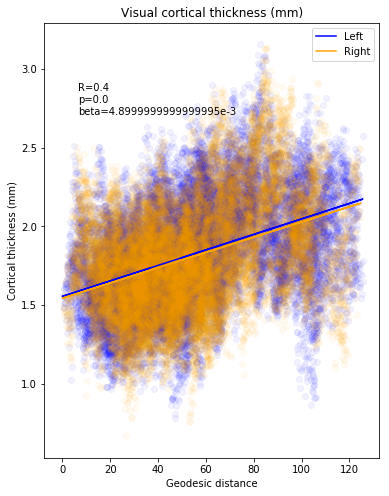

In [31]:
fig, axs = plt.subplots(1,1,figsize=(6,8))
fig.subplots_adjust(hspace=.3,wspace=.2)
geodist=np.loadtxt('geodesic_left.txt')
all_visual_areas=np.zeros(len(geodist)).astype(int)
k=-1
for h in range(2):
        hemi=hemis[h]
        hemic=hemics[h]
        Parcellation = nb.freesurfer.io.read_annot('/data1/users/kwagstyl/wmdist/CIVET/CIVET2_average/label/'+hemi+'.HCP-MMP1.annot')
        PNames=Parcellation[2]
        for k,name in enumerate(PNames):
            PNames[k]=name.decode('UTF-8')
        Plocations=np.array(Parcellation[0])   
        TotalThickness=np.loadtxt('thickness_'+hemic+'_total_rsl.txt')
        NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
        if hemi=='rh':
            NamesHCP=np.core.defchararray.replace(NamesHCP,'L_','R_')
        k=-1
        all_visual_areas=np.zeros(len(geodist)).astype(int)
        for name in NamesHCP:
            k+=1
            ID=PNames.index(name)
            all_visual_areas[np.where(Plocations==ID)[0]]=1
        print(sum(all_visual_areas))
        np.savetxt('visualgradient_regions_'+hemic+'.txt', all_visual_areas)
        all_visual_areas=np.where(all_visual_areas==1)[0]
        if hemi=='lh':
            Combi=TotalThickness[all_visual_areas]
            GeoCombi=geodist[all_visual_areas]
        else:
            Combi=np.hstack((TotalThickness[all_visual_areas],Combi))
            GeoCombi=np.hstack((geodist[all_visual_areas],GeoCombi))
            R, P = pearsonr(GeoCombi,Combi)
            regr = linear_model.LinearRegression()
            regr.fit(np.reshape(GeoCombi,(len(GeoCombi),1)),Combi)
            axs.annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4))+'\nbeta='+str(np.round(regr.coef_[0],4)*1000)+'e-3',xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')

        axs.scatter(geodist[all_visual_areas],TotalThickness[all_visual_areas],alpha=0.05,color=colours[h])
        m,b = np.polyfit(geodist[all_visual_areas],TotalThickness[all_visual_areas], 1)
        axs.plot(geodist[all_visual_areas], m*geodist[all_visual_areas] + b,'-',color=colours[h])
        axs.set_title("Visual cortical thickness (mm)")
        axs.set_xlabel('Geodesic distance')
        axs.set_ylabel('Cortical thickness (mm)')
        axs.legend(['Left','Right'])


fig.savefig('VisualThicknessGeodesic.png',dpi=300)

In [ ]:
#confidence interval. fisher r to z
#z to r is tanh. 1/sqrt(N-3) is standard error. Multiply by 2.58 to gize 99% confidence interval
Top=np.tanh(np.arctanh(R) + (2.58/np.sqrt(2*len(all_visual_areas)-3)))
Bottom=np.tanh(np.arctanh(R) - (2.58/np.sqrt(2*len(all_visual_areas)-3)))
Top

/data1/users/kwagstyl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:69: RuntimeWarning: divide by zero encountered in divide


[0.18,0.2]
[0.23,0.26]
[0.2,0.22]


/data1/users/kwagstyl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:69: RuntimeWarning: invalid value encountered in divide
/data1/users/kwagstyl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:70: RuntimeWarning: invalid value encountered in greater


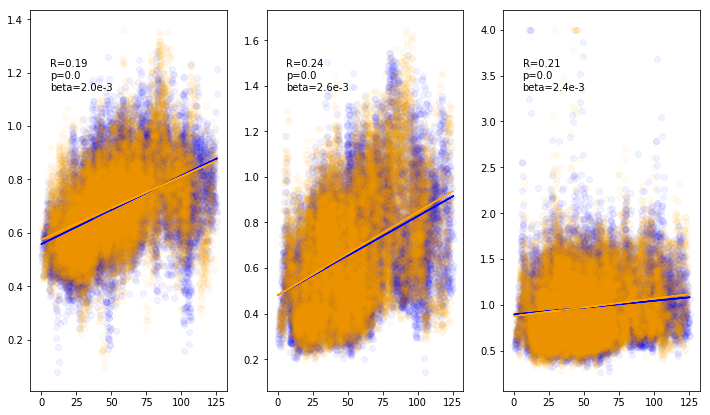

[0.16,0.19]
[0.36,0.38]
[0.42,0.44]
[-0.37,-0.35]
[0.43,0.45]
[0.33,0.35]


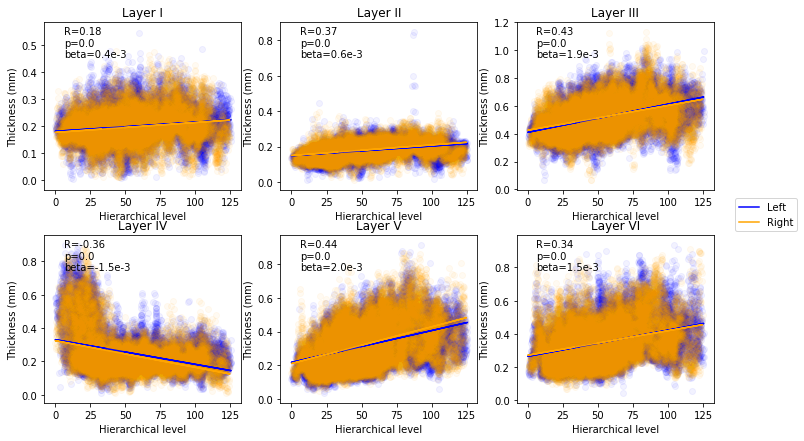

In [20]:
fig, axs = plt.subplots(2,3,figsize=(12,7))
fig.subplots_adjust(hspace=.27,wspace=.2)
axs=axs.ravel()
geodist=np.loadtxt('geodesic_left.txt')
for i in range(6):
    for h in range(2):
        hemi=hemis[h]
        hemic=hemics[h]
        Parcellation = nb.freesurfer.io.read_annot('/data1/users/kwagstyl/wmdist/CIVET/CIVET2_average/label/'+hemi+'.HCP-MMP1.annot')
        PNames=Parcellation[2]
        Plocations=np.array(Parcellation[0])   
        NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
        all_visual_areas=np.zeros(len(geodist)).astype(int)
        if hemi=='rh':
            NamesHCP=np.core.defchararray.replace(NamesHCP,'L_','R_')
        Thickness["layer{0}".format(i+1)]=np.loadtxt('thickness_'+hemic+'_layer'+str(i+1)+'_rsl.txt')
        k=-1
        for name in NamesHCP:
            k+=1
            ID=PNames.index(name)
            all_visual_areas[np.where(Plocations==ID)[0]]=1
        all_visual_areas=np.where(all_visual_areas==1)[0]
        axs[i].scatter(geodist[all_visual_areas],Thickness["layer{0}".format(i+1)][all_visual_areas],alpha=0.05,color=colours[h])
        m,b = np.polyfit(geodist[all_visual_areas],Thickness["layer{0}".format(i+1)][all_visual_areas], 1)
        axs[i].plot(geodist[all_visual_areas], m*geodist[all_visual_areas] + b,'-',color=colours[h])
       # m,b = np.polyfit(HierarchyLevels, Mean_thickness, 1)
   # axs[i].plot(HierarchyLevels, m*HierarchyLevels + b,'-',color='black')
        if hemi=='lh':
            Combi=Thickness["layer{0}".format(i+1)][all_visual_areas]
            GeoCombi=geodist[all_visual_areas]
        else:
            Combi=np.hstack((Thickness["layer{0}".format(i+1)][all_visual_areas],Combi))
            GeoCombi=np.hstack((geodist[all_visual_areas],GeoCombi))
            R, P = pearsonr(GeoCombi,Combi)
            Top=np.tanh(np.arctanh(R) + (2.58/np.sqrt(2*len(all_visual_areas)-3)))
            Bottom=np.tanh(np.arctanh(R) - (2.58/np.sqrt(2*len(all_visual_areas)-3)))
            print('['+str(np.round(Bottom,2)) + ',' +str(np.round(Top,2))+']')
            regr = linear_model.LinearRegression()
            regr.fit(np.reshape(GeoCombi,(len(GeoCombi),1)),Combi)
            axs[i].annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4))+'\nbeta='+str(np.round(regr.coef_[0],4)*1000)+'e-3',xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')
        axs[i].set_title(Layers[i])
        axs[i].set_xlabel('Hierarchical level')
        axs[i].set_ylabel('Thickness (mm)')
        
axs[5].legend(['Left','Right'],bbox_to_anchor=(1.45, 1.25))


fig.savefig('HistologicalLayerThicknessGeodesic.png',dpi=300)

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12,7))
fig.subplots_adjust(hspace=.27,wspace=.2)
axs=axs.ravel()
geodist=np.loadtxt('geodesic_left.txt')
for h in range(2):
    hemi=hemis[h]
    hemic=hemics[h]
    Parcellation = nb.freesurfer.io.read_annot('/data1/users/kwagstyl/wmdist/CIVET/CIVET2_average/label/'+hemi+'.HCP-MMP1.annot')
    PNames=Parcellation[2]
    Plocations=np.array(Parcellation[0])   
    NamesHCP=np.array(['L_V1_ROI','L_V2_ROI','L_V3_ROI','L_V3A_ROI','L_V3B_ROI','L_V3CD_ROI','L_V4_ROI','L_MT_ROI',
          'L_MST_ROI','L_V6_ROI','L_V6A_ROI',
          'L_PIT_ROI','L_V8_ROI','L_LO1_ROI','L_LO2_ROI','L_LO3_ROI','L_LIPv_ROI','L_LIPd_ROI',
          'L_VIP_ROI','L_FFC_ROI','L_TF_ROI',
          'L_FST_ROI'])
    all_visual_areas=np.zeros(len(geodist)).astype(int)
    if hemi=='rh':
        NamesHCP=np.core.defchararray.replace(NamesHCP,'L_','R_')

    for i in range(6):
        Thickness["layer{0}".format(i+1)]=np.loadtxt('thickness_'+hemic+'_layer'+str(i+1)+'_rsl.txt')
    Supragranular_thickness=Thickness["layer{0}".format(2)] + Thickness["layer{0}".format(3)]
    Infragranular_thickness=Thickness["layer{0}".format(5)] + Thickness["layer{0}".format(6)]
    k=-1
    for name in NamesHCP:
        k+=1
        ID=PNames.index(name)
        all_visual_areas[np.where(Plocations==ID)[0]]=1
    all_visual_areas=np.where(all_visual_areas==1)[0]
    
    axs[0].scatter(geodist[all_visual_areas],Supragranular_thickness[all_visual_areas],alpha=0.05,color=colours[h])
    m,b = np.polyfit(geodist[all_visual_areas],Supragranular_thickness[all_visual_areas], 1)
    axs[0].plot(geodist[all_visual_areas], m*geodist[all_visual_areas] + b,'-',color=colours[h])
       # m,b = np.polyfit(HierarchyLevels, Mean_thickness, 1)
   # axs[i].plot(HierarchyLevels, m*HierarchyLevels + b,'-',color='black')
    if hemi=='lh':
        Combi=Supragranular_thickness[all_visual_areas]
        GeoCombi=geodist[all_visual_areas]
    else:
        Combi=np.hstack((Supragranular_thickness[all_visual_areas],Combi))
        GeoCombi=np.hstack((geodist[all_visual_areas],GeoCombi))
        R, P = pearsonr(GeoCombi,Combi)
        Top=np.tanh(np.arctanh(R) + (2.58/np.sqrt(2*len(all_visual_areas)-3)))
        Bottom=np.tanh(np.arctanh(R) - (2.58/np.sqrt(2*len(all_visual_areas)-3)))
        print('['+str(np.round(Bottom,2)) + ',' +str(np.round(Top,2))+']')
        regr = linear_model.LinearRegression()
        regr.fit(np.reshape(GeoCombi,(len(GeoCombi),1)),Combi)
        axs[0].annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4))+'\nbeta='+str(np.round(regr.coef_[0],4)*1000)+'e-3',xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')

    axs[1].scatter(geodist[all_visual_areas],Infragranular_thickness[all_visual_areas],alpha=0.05,color=colours[h])
    m,b = np.polyfit(geodist[all_visual_areas],Infragranular_thickness[all_visual_areas], 1)
    axs[1].plot(geodist[all_visual_areas], m*geodist[all_visual_areas] + b,'-',color=colours[h])
       # m,b = np.polyfit(HierarchyLevels, Mean_thickness, 1)
   # axs[i].plot(HierarchyLevels, m*HierarchyLevels + b,'-',color='black')
    if hemi=='lh':
        Combi=Infragranular_thickness[all_visual_areas]
        GeoCombi=geodist[all_visual_areas]
    else:
        Combi=np.hstack((Infragranular_thickness[all_visual_areas],Combi))
        GeoCombi=np.hstack((geodist[all_visual_areas],GeoCombi))
        R, P = pearsonr(GeoCombi,Combi)
        Top=np.tanh(np.arctanh(R) + (2.58/np.sqrt(2*len(all_visual_areas)-3)))
        Bottom=np.tanh(np.arctanh(R) - (2.58/np.sqrt(2*len(all_visual_areas)-3)))
        print('['+str(np.round(Bottom,2)) + ',' +str(np.round(Top,2))+']')
        regr = linear_model.LinearRegression()
        regr.fit(np.reshape(GeoCombi,(len(GeoCombi),1)),Combi)
        axs[1].annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4))+'\nbeta='+str(np.round(regr.coef_[0],4)*1000)+'e-3',xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')

    Ratio=Infragranular_thickness/Supragranular_thickness
    Ratio[Ratio>4]=4
    axs[2].scatter(geodist[all_visual_areas],Ratio[all_visual_areas],alpha=0.05,color=colours[h])
    m,b = np.polyfit(geodist[all_visual_areas],Ratio[all_visual_areas], 1)
    axs[2].plot(geodist[all_visual_areas], m*geodist[all_visual_areas] + b,'-',color=colours[h])
       # m,b = np.polyfit(HierarchyLevels, Mean_thickness, 1)
   # axs[i].plot(HierarchyLevels, m*HierarchyLevels + b,'-',color='black')
    if hemi=='lh':
        Combi=Ratio[all_visual_areas]
        GeoCombi=geodist[all_visual_areas]
    else:
        Combi=np.hstack((Ratio[all_visual_areas],Combi))
        GeoCombi=np.hstack((geodist[all_visual_areas],GeoCombi))
        R, P = pearsonr(GeoCombi,Combi)
        Top=np.tanh(np.arctanh(R) + (2.58/np.sqrt(2*len(all_visual_areas)-3)))
        Bottom=np.tanh(np.arctanh(R) - (2.58/np.sqrt(2*len(all_visual_areas)-3)))
        print('['+str(np.round(Bottom,2)) + ',' +str(np.round(Top,2))+']')
        regr = linear_model.LinearRegression()
        regr.fit(np.reshape(GeoCombi,(len(GeoCombi),1)),Combi)
        axs[2].annotate('R='+str(np.round(R,2))+'\np='+str(np.round(P,4))+'\nbeta='+str(np.round(regr.coef_[0],4)*1000)+'e-3',xy=(0.1,0.8),xycoords='axes fraction', xytext=(0.1,0.79),textcoords='axes fraction')


In [ ]:
geodist

In [ ]:
pearsonr(geodist,wmdist)

In [ ]:
spearmanr(HierarchyLevels,Mean_thickness)

In [ ]:
len(Thickness)